# BIOEN 498 Special Topics: Advanced Controls for Biological Systems
HW3

Sophia Shan

03/08/2024





**Comments**: 25/25. Good problem description, but you need to refine the operating region more. See my comments. Please make refinements before you submit HW 2.

# 1. Problem Description and System Design

The problem that we want to investigate in this assignment is the potential mechanism of glucose regulation in adipocytes. We manipulate the concentration of Insulin receptor, which is reduced under diseased condition, and observe the concentration of insulin-regulated glucose transporter GLUT4, which is responsible for transporting the glucose into fat cells for storage.

In terms of control objectives, we want to test the influence of insulin concentration on Glut4 receptor, which influences the glucose concentration in the blood.

# 2. System Identification

The SBML model we will use is the insulin signalling in human adipocytes.

The output of our system is the insulin-regulated glucose transporter GLUT4, and the system input is the level of insulin receptors.

The effect of insulin receptor increase seems to have non-monotonic effect on blood glucose level in the beginning, but after settling time, the increase of insulin receptor has a negative monotonic effect on blood glucose level.

The reasonable input operating region is roughly 0 - 50. And the range of outputs that can be achieved is 5 - 50.





updates: 02/07/2024



 SBML model:insulin signalling in human adipocytes.

1. Output: insulin-regulated glucose transporter GLUT4
1. Input: insulin receptor
1. Directional effect of the input on the output: monotonic increase effect.
1. Operating region for the input: 0-50
1. Range of outputs that can be achieved: 5-50


In [ ]:
!pip install -q controlSBML
!pip install -q tellurium
!pip install numpy==1.24.4

In [ ]:
from controlSBML import ControlSBML
import controlSBML
import control
import tellurium as te
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Function that adjust model parameters
def plotModel(model, title="", is_plot=True, input_species=None, times=np.linspace(0, 5, 50), selections=None, figsize=(4,4), **kwargs):
    """
    Plots the simulation with the specified parameter values.

    Parameters
    ----------
    model: str either antimony or URL
    title: str (plot title)
    is_plot: bool
    input_species: str (species used as input if it is not a boundary/fixed species in the model)
    times: array-float (times for simulations)
    selections: list-str (species to plot)
    figsize: int, int (dimensions of the figure)
    kwargs: dict
        key: parameter name
        value: parameter value

    Returns
    -------
    NamedArray
    """
    if "http" in model:
        rr = te.loadSBMLModel(model)
    else:
        rr = te.loada(model)
    if input_species is not None:
        rr.setBoundary(input_species, True)
    if selections is not None:
        new_selections = list(selections)
        if not "time" in selections:
            new_selections.insert(0, "time")
    else:
        new_selections = selections
    for name, value in kwargs.items():
        rr[name] = value
    simulation_results = rr.simulate(times[0], times[-1], len(times), selections=new_selections)
    if is_plot:
        _, ax = plt.subplots(1, figsize=figsize)
        columns = simulation_results.colnames
        columns = columns[1:]
        for column in columns:
            if column == "time":
                next
            ax.plot(simulation_results[:, 0], simulation_results[column])
        plt.legend(columns)
        ax.set_xlabel("time")
    return simulation_results


In [ ]:
URL = "https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1304160000/2/BIOMD0000000449_url.xml"
# "https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL0911270008/3/BIOMD0000000663_url.xml"
#"https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1304160000/2/BIOMD0000000449_url.xml"
#"https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1504130001/3/BIOMD0000000575_url.xml"
#"https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1608150000/2/BIOMD0000000615_url.xml"

# "https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1909250003/2/Varusai2018.xml"
#"https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL0912070000/2/BIOMD0000000293_url.xml"
#"https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1608150000/2/BIOMD0000000615_url.xml"
mod = te.loadSBMLModel(URL)
mod.getFloatingSpeciesIds()

['IR',
 'IRp',
 'IRins',
 'IRip',
 'IRi',
 'IRS1',
 'IRS1p',
 'IRS1p307',
 'IRS1307',
 'X',
 'Xp',
 'PKB',
 'PKB308p',
 'PKB473p',
 'PKB308p473p',
 'mTORC1',
 'mTORC1a',
 'mTORC2',
 'mTORC2a',
 'AS160',
 'AS160p',
 'GLUT4m',
 'GLUT4',
 'S6K',
 'S6Kp',
 'S6',
 'S6p']

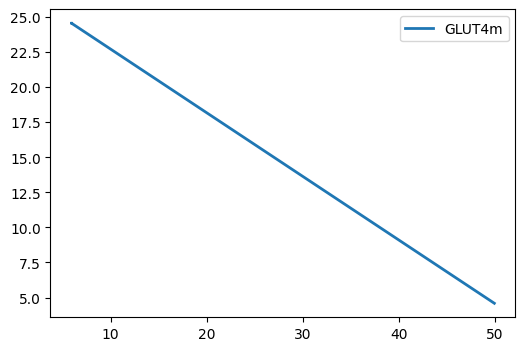

In [ ]:
rez = mod.simulate(0, 100000, selections = ['IR', 'GLUT4m'])
mod.plot()

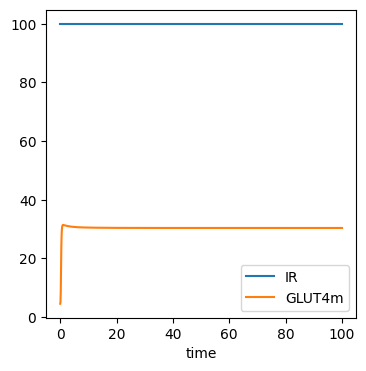

In [ ]:
_ = plotModel(URL,  input_species="IR", selections=[ "IR",  "GLUT4m"], IR = 100, times=np.linspace(0, 100, 1000))

**Comments:** Use print so this is formatted - ``print(mod.getAntimony()``

In [ ]:
print(mod.getAntimony())

// Created by libAntimony v2.14.0
model *MODEL1304160000()

  // Compartments and Species:
  compartment cellvolume;
  species IR in cellvolume, IRp in cellvolume, IRins in cellvolume, IRip in cellvolume;
  species IRi in cellvolume, IRS1 in cellvolume, IRS1p in cellvolume, IRS1p307 in cellvolume;
  species IRS1307 in cellvolume, X in cellvolume, Xp in cellvolume, PKB in cellvolume;
  species PKB308p in cellvolume, PKB473p in cellvolume, PKB308p473p in cellvolume;
  species mTORC1 in cellvolume, mTORC1a in cellvolume, mTORC2 in cellvolume;
  species mTORC2a in cellvolume, AS160 in cellvolume, AS160p in cellvolume;
  species GLUT4m in cellvolume, GLUT4 in cellvolume, S6K in cellvolume, S6Kp in cellvolume;
  species S6 in cellvolume, S6p in cellvolume;

  // Assignment Rules:
  measuredIRp := scaleIR*(IRp + IRip);
  measuredIRint := IRi + IRip;
  measuredIRS1p := scaleIRS1*(IRS1p + IRS1p307);
  measuredIRS1307 := scaleIRS1307*(IRS1p307 + IRS1307);
  measuredPKB308p := scalePKB308*(PKB308

In [ ]:
TIMES = np.linspace(0, 200, 2000)
ctlsb = controlSBML.ControlSBML(URL, times = TIMES, input_names=["IR"], output_names=["GLUT4m"], is_fixed_input_species=True)

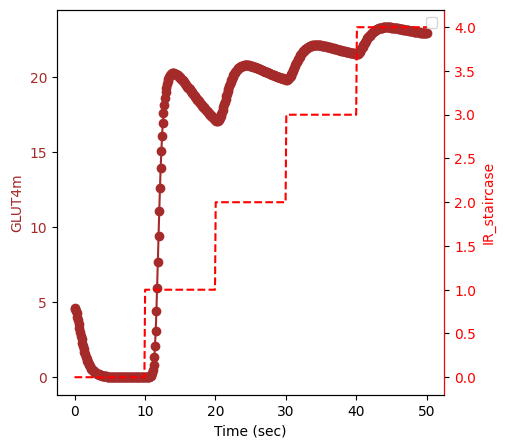

In [ ]:
_, builder = ctlsb.plotStaircaseResponse(initial_value=0, final_value=4, num_step=4,
                                         times=np.linspace(0, 50, 500))

**Comments:** You may want to limit the operating region so that you get better distinction between steps. Also, there are some dynamics in the system that aren't apparent in the time scale that you used. See the plot below.

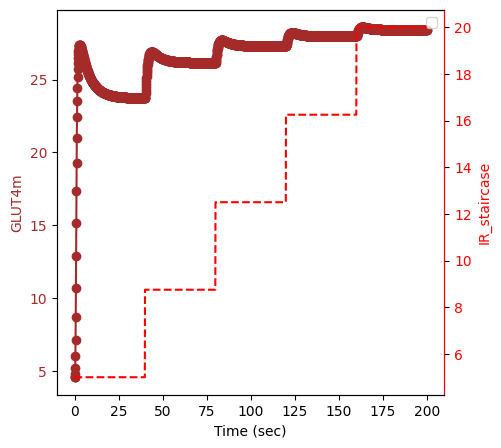

In [ ]:
_ = ctlsb.plotStaircaseResponse(initial_value=5, final_value=20, num_step=4,times=np.linspace(0, 200, 2000))

**3. Fit Transfer Function**

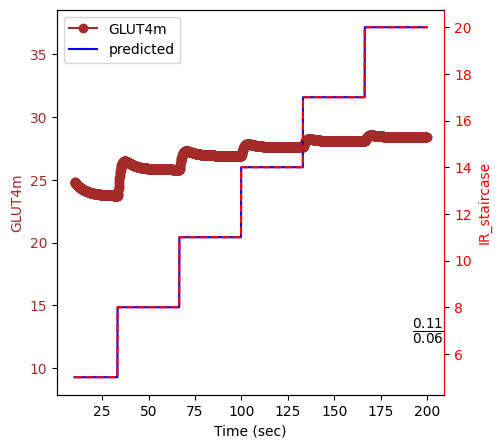

In [ ]:
_ = ctlsb.plotTransferFunctionFit(num_numerator=1, num_denominator=2,initial_value=5, final_value=20,fit_start_time=10, times=np.linspace(0, 200, 2000))

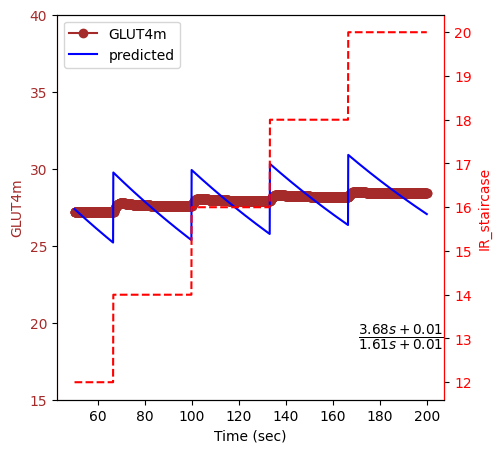

In [ ]:
fit_2_2 = ctlsb.plotTransferFunctionFit(num_numerator=2, num_denominator=2, initial_value=10, final_value=20,fit_start_time=50,
                                  times=np.linspace(0, 200, 2000), ylim = [15, 40])

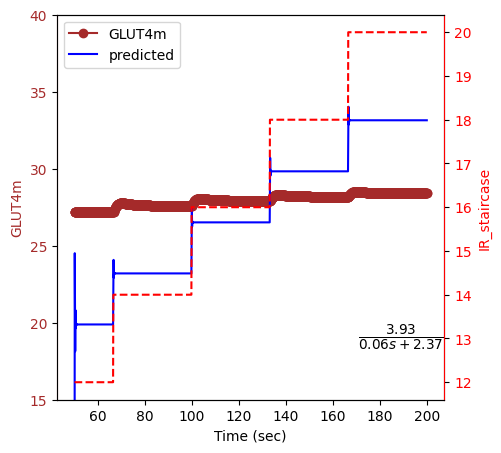

In [ ]:
_ = ctlsb.plotTransferFunctionFit(num_numerator=1, num_denominator=3, initial_value=10, final_value=20, fit_start_time=50,
                                  times=np.linspace(0, 200, 2000), ylim = [15, 40])
# _ = ctlsb.plotTransferFunctionFit()

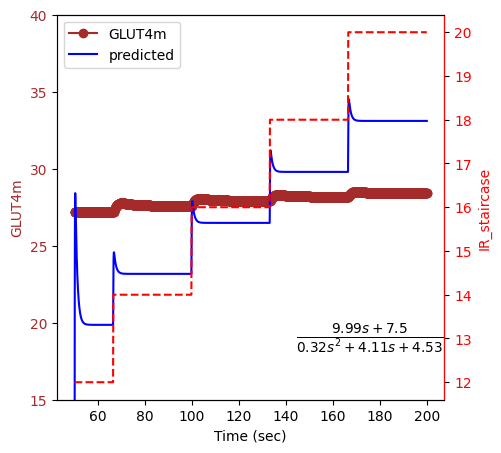

In [ ]:
_ = ctlsb.plotTransferFunctionFit(num_numerator=2, num_denominator=3, initial_value=10, final_value=20,fit_start_time=50,
                                   times=np.linspace(0, 200, 2000), ylim = [15, 40])

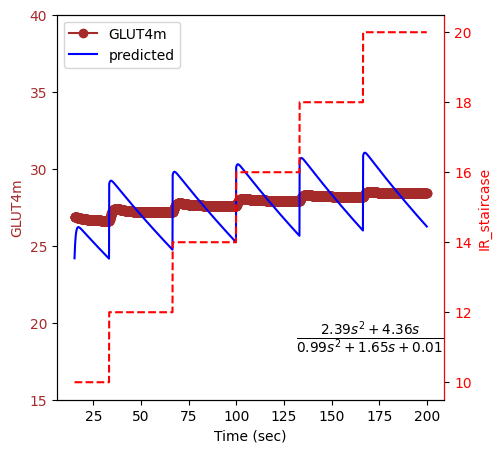

In [ ]:
fit_3_3 = ctlsb.plotTransferFunctionFit(num_numerator=3, num_denominator=3, initial_value=10, final_value=20, fit_start_time = 15, times=np.linspace(0, 200, 2000), ylim = [15, 40])

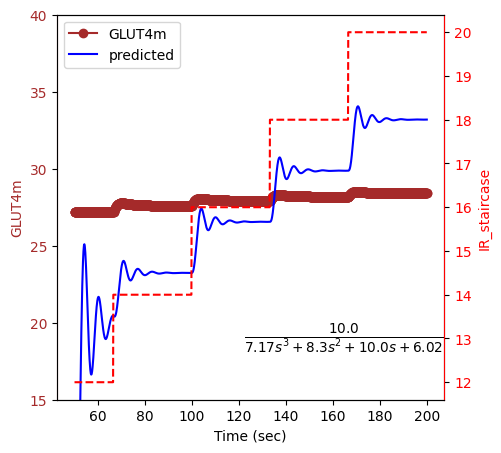

In [ ]:
_ = ctlsb.plotTransferFunctionFit(num_numerator=1, num_denominator=4, initial_value=10, final_value=20,fit_start_time=50,
                                  times=np.linspace(0, 200, 2000), ylim = [15, 40])

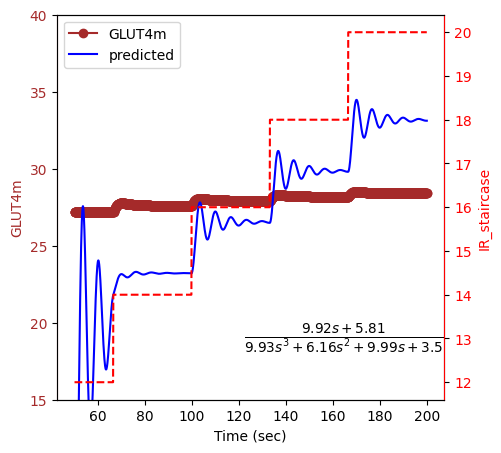

In [ ]:
_ = ctlsb.plotTransferFunctionFit(num_numerator=2, num_denominator=4, initial_value=10, final_value=20,fit_start_time=50,
                                  times=np.linspace(0, 200, 2000), ylim = [15, 40])

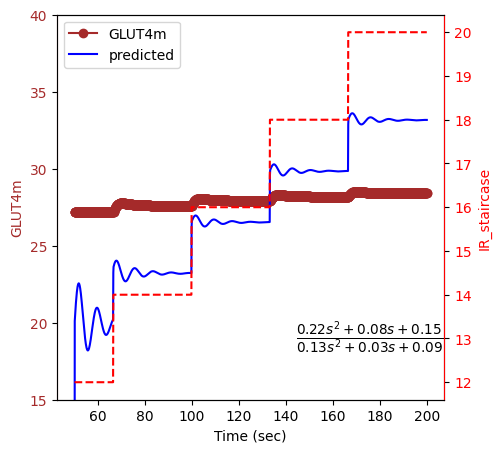

In [ ]:
fit_3_4 = ctlsb.plotTransferFunctionFit(num_numerator=3, num_denominator=4, initial_value=10, final_value=20,fit_start_time=50,
                                  times=np.linspace(0, 200, 2000), ylim = [15, 40])

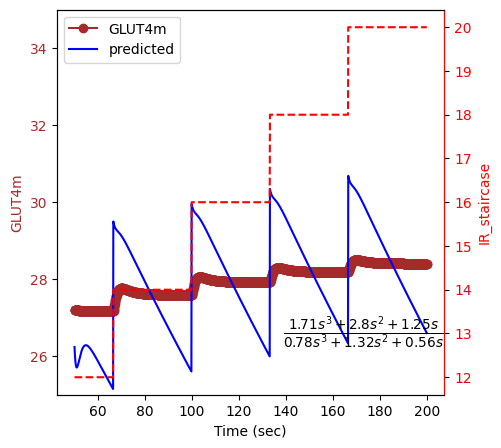

In [ ]:
fit_4_4 = ctlsb.plotTransferFunctionFit(num_numerator=4, num_denominator=4, initial_value=10, final_value=20,fit_start_time=50,
                                  times=np.linspace(0, 200, 2000), ylim = [25, 35])

In [ ]:
# Evaluate which one is the best fit

def calculate_R(fitted):
  actual = fitted[0].loc[:, ['GLUT4m']].values
  predicted = fitted[0].loc[:,['predicted'] ].values

  mean_actual = np.mean(actual)
  r_squared = 1 - (np.sum((actual - predicted) ** 2) / np.sum((actual - mean_actual) ** 2))

  return r_squared

r_2_2 = calculate_R(fit_2_2)
print(r_2_2)
r_3_3 = calculate_R(fit_3_3)
print(r_3_3)
r_4_4 = calculate_R(fit_4_4)
print(r_4_4)
r_3_4 = calculate_R(fit_3_4)
print(r_3_4)
# choose nominator is 3 and denominator is 3's fit

-7.9821597570379215
-5.70766451463592
-7.9049335847819275
-103.83912580852761


Print out the transfer function


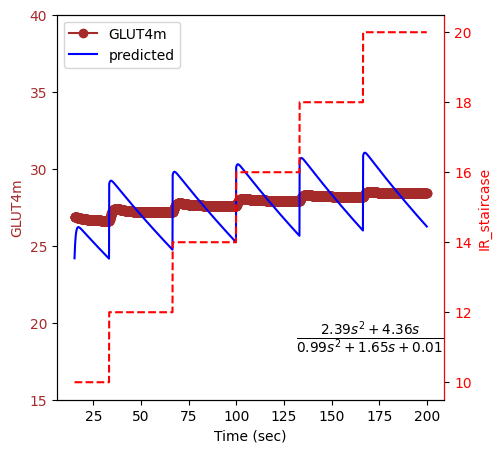

In [ ]:
_= ctlsb.plotTransferFunctionFit(num_numerator=3, num_denominator=3, initial_value=10, final_value=20, fit_start_time = 15, times=np.linspace(0, 200, 2000), ylim = [15, 40])


In [ ]:
TRANSFER_FUNCTION = ctlsb.getOpenLoopTransferFunction()
TRANSFER_FUNCTION

TransferFunction(array([2.39093688, 4.35913728, 0.        ]), array([0.98870049, 1.64615188, 0.00862519]))

In [ ]:
TRANSFER_FUNCTION.poles(), TRANSFER_FUNCTION.zeros()

(array([-1.65970897+0.j, -0.0052562 +0.j]),
 array([-1.82319212+0.j,  0.        +0.j]))

# 3. Testbed Construction and Control Design

In [ ]:
gluc_model = '''// Created by libAntimony v2.14.0
model *MODEL1304160000()

  // Compartments and Species:
  compartment cellvolume;
  species IR in cellvolume, IRp in cellvolume, IRins in cellvolume, IRip in cellvolume;
  species IRi in cellvolume, IRS1 in cellvolume, IRS1p in cellvolume, IRS1p307 in cellvolume;
  species IRS1307 in cellvolume, X in cellvolume, Xp in cellvolume, PKB in cellvolume;
  species PKB308p in cellvolume, PKB473p in cellvolume, PKB308p473p in cellvolume;
  species mTORC1 in cellvolume, mTORC1a in cellvolume, mTORC2 in cellvolume;
  species mTORC2a in cellvolume, AS160 in cellvolume, AS160p in cellvolume;
  species GLUT4m in cellvolume, GLUT4 in cellvolume, S6K in cellvolume, S6Kp in cellvolume;
  species S6 in cellvolume, S6p in cellvolume;

  // Assignment Rules:
  measuredIRp := scaleIR*(IRp + IRip);
  measuredIRint := IRi + IRip;
  measuredIRS1p := scaleIRS1*(IRS1p + IRS1p307);
  measuredIRS1307 := scaleIRS1307*(IRS1p307 + IRS1307);
  measuredPKB308p := scalePKB308*(PKB308p + PKB308p473p);
  measuredPKB473p := scalePKB473*(PKB473p + PKB308p473p);
  measuredAS160p := scaleAS160*AS160p;
  measuredmTORC1a := mTORC1a;
  measuredS6Kp := scaleS6K*S6Kp;
  measuredS6p := scaleS6*S6p;
  measuredmTORC2a := mTORC2a;
  glucoseuptake := k8*GLUT4m*gluc + glut1*gluc;

  // Reactions:
  v1a: IR => IRins; IR*k1a*insulin;
  v1basal: IR => IRp; k1basal*IR;
  v1c: IRins => IRp; IRins*k1c;
  v1d: IRp => IRip; IRp*k1d;
  v1e: IRip => IRi; IRip*k1f*Xp;
  v1g: IRp => IR; IRp*k1g;
  v1r: IRi => IR; IRi*k1r;
  v2a: IRS1 => IRS1p; IRS1*k2a*IRip;
  v2b: IRS1p => IRS1; IRS1p*k2b;
  v2c: IRS1p => IRS1p307; IRS1p*k2c*mTORC1a*diabetes;
  v2d: IRS1p307 => IRS1p; IRS1p307*k2d;
  v2f: IRS1p307 => IRS1307; IRS1p307*k2f;
  v2basal: IRS1 => IRS1307; IRS1*k2basal;
  v2g: IRS1307 => IRS1; IRS1307*k2g;
  v3a: X => Xp; X*k3a*IRS1p;
  v3b: Xp => X; Xp*k3b;
  v5a: mTORC1 => mTORC1a; mTORC1*(k5a1*PKB308p473p + k5a2*PKB308p);
  v5b: mTORC1a => mTORC1; mTORC1a*k5b;
  v5c: mTORC2 => mTORC2a; mTORC2*k5c*IRip;
  v5d: mTORC2a => mTORC2; k5d*mTORC2a;
  v4a: PKB => PKB308p; k4a*PKB*IRS1p;
  v4b: PKB308p => PKB; k4b*PKB308p;
  v4c: PKB308p => PKB308p473p; k4c*PKB308p*mTORC2a;
  v4e: PKB473p => PKB308p473p; k4e*PKB473p*IRS1p307;
  v4f: PKB308p473p => PKB473p; k4f*PKB308p473p;
  v4h: PKB473p => PKB; k4h*PKB473p;
  v6f1: AS160 => AS160p; AS160*(k6f1*PKB308p473p + k6f2*PKB473p^n6/(km6^n6 + PKB473p^n6));
  v6b1: AS160p => AS160; AS160p*k6b;
  v7f: GLUT4 => GLUT4m; GLUT4*k7f*AS160p;
  v7b: GLUT4m => GLUT4; GLUT4m*k7b;
  v9f1: S6K => S6Kp; S6K*k9f1*mTORC1a^n9/(km9^n9 + mTORC1a^n9);
  v9b1: S6Kp => S6K; S6Kp*k9b1;
  v9f2: S6 => S6p; S6*k9f2*S6Kp;
  v9b2: S6p => S6; S6p*k9b2;

  // Species initializations:
  IR = 49.9344643421136;
  IRp = 0.000931221500588088;
  IRins = 0;
  IRip = 0.011815001204792;
  IRi = 0.0527894351383809;
  IRS1 = 86.2418960059256;
  IRS1p = 0.00095272377217019;
  IRS1p307 = 0.00891531075576947;
  IRS1307 = 13.7482359094757;
  X = 99.9986712896423;
  Xp = 0.00132871035763352;
  PKB = 78.0219322115859;
  PKB308p = 12.2197372437326;
  PKB473p = 9.6963389945784;
  PKB308p473p = 0.061992532897245;
  mTORC1 = 96.927052256569;
  mTORC1a = 3.07294774343092;
  mTORC2 = 99.9045223943705;
  mTORC2a = 0.0954776056294795;
  AS160 = 95.4699007486273;
  AS160p = 4.53009925137289;
  GLUT4m = 4.5880858350243;
  GLUT4 = 45.4119141649757;
  S6K = 99.8296860066098;
  S6Kp = 0.170313993390069;
  S6 = 98.2037625421647;
  S6p = 1.79623745783512;

  // Compartment initializations:
  cellvolume = 1;

  // Variable initializations:
  diabetes = 0.15;
  k1a = 0.6331;
  k1basal = 0.03683;
  k1c = 0.8768;
  k1d = 31.01;
  k1f = 1840;
  k1g = 1944;
  k1r = 0.5471;
  k2a = 3.227;
  k2c = 5759;
  k2basal = 0.04228;
  k2b = 3424;
  k2d = 280.8;
  k2f = 2.913;
  k2g = 0.2671;
  k3a = 0.001377;
  k3b = 0.09876;
  k4a = 5790;
  k4b = 34.8;
  k4c = 4.456;
  k4e = 42.84;
  k4f = 143.6;
  k4h = 0.5361;
  k5a1 = 1.842;
  k5a2 = 0.05506;
  k5b = 24.83;
  k5d = 1.06;
  km5 = 2.65;
  k5c = 0.08575;
  k6f1 = 2.652;
  k6f2 = 36.93;
  km6 = 30.54;
  n6 = 2.137;
  k6b = 65.18;
  k7f = 50.98;
  k7b = 2286;
  k8 = 724.2;
  glut1 = 7042;
  k9f1 = 0.1298;
  k9b1 = 0.04441;
  k9f2 = 3.329;
  k9b2 = 31;
  km9 = 5873;
  n9 = 0.9855;
  scaleIR = 5.202;
  scaleIRS1 = 0.3761;
  scaleIRS1ds = 14.89;
  scaleIRS1307 = 0.05866;
  scalePKB308 = 0.04356;
  scalePKB473 = 0.013;
  scaleAS160 = 0.026656;
  scaleGLUCOSE = 0.04051;
  scaleS6K = 0.7465;
  scaleS6 = 0.1149;
  gluc = 0.05;
  insulin = 10;

  // Other declarations:
  var measuredIRp, measuredIRint, measuredIRS1p, measuredIRS1307, measuredPKB308p;
  var measuredPKB473p, measuredAS160p, measuredmTORC1a, measuredS6Kp, measuredS6p;
  var measuredmTORC2a, glucoseuptake;
  const cellvolume, diabetes, k1a, k1basal, k1c, k1d, k1f, k1g, k1r, k2a;
  const k2c, k2basal, k2b, k2d, k2f, k2g, k3a, k3b, k4a, k4b, k4c, k4e, k4f;
  const k4h, k5a1, k5a2, k5b, k5d, km5, k5c, k6f1, k6f2, km6, n6, k6b, k7f;
  const k7b, k8, glut1, k9f1, k9b1, k9f2, k9b2, km9, n9, scaleIR, scaleIRS1;
  const scaleIRS1ds, scaleIRS1307, scalePKB308, scalePKB473, scaleAS160, scaleGLUCOSE;
  const scaleS6K, scaleS6, gluc, insulin;

  // SBO terms:
  cellvolume.sboTerm = 290

  // CV terms:
  cellvolume identity "http://identifiers.org/go/GO:0005623"
  IR hypernym "http://identifiers.org/uniprot/P06213"
  IRp hypernym "http://identifiers.org/uniprot/P06213",
               "http://identifiers.org/kegg.compound/C00562"
  IRins part "http://identifiers.org/uniprot/P06213"
  IRip hypernym "http://identifiers.org/uniprot/P06213",
                "http://identifiers.org/kegg.compound/C00562"
  IRi hypernym "http://identifiers.org/uniprot/P06213"
  IRS1 hypernym "http://identifiers.org/uniprot/P35568"
  IRS1p hypernym "http://identifiers.org/uniprot/P35568",
                 "http://identifiers.org/kegg.compound/C00562"
  IRS1p307 hypernym "http://identifiers.org/uniprot/P35568",
                    "http://identifiers.org/kegg.compound/C00562",
                    "urn:miriam:mod:MOD%3A00046"
  IRS1307 hypernym "http://identifiers.org/uniprot/P35568"
  X hypernym "http://identifiers.org/chebi/CHEBI:36080",
             "http://identifiers.org/fma/FMA:74531"
  Xp hypernym "http://identifiers.org/kegg.compound/C00562",
              "http://identifiers.org/fma/FMA:74531"
  PKB hypernym "http://identifiers.org/uniprot/P31751"
  PKB308p hypernym "http://identifiers.org/uniprot/P31751",
                   "http://identifiers.org/kegg.compound/C00562"
  PKB473p hypernym "http://identifiers.org/uniprot/P31751",
                   "http://identifiers.org/kegg.compound/C00562"
  PKB308p473p hypernym "http://identifiers.org/uniprot/P31751",
                       "http://identifiers.org/kegg.compound/C00562"
  mTORC1 part "http://identifiers.org/uniprot/P42345",
              "http://identifiers.org/uniprot/Q8N122"
  mTORC1a part "http://identifiers.org/uniprot/P42345",
               "http://identifiers.org/uniprot/Q8N122"
  mTORC2 part "http://identifiers.org/uniprot/P42345",
              "http://identifiers.org/uniprot/Q6R327"
  mTORC2a part "http://identifiers.org/uniprot/P42345",
               "http://identifiers.org/uniprot/Q6R327"
  AS160 hypernym "http://identifiers.org/uniprot/O60343"
  AS160p property "http://identifiers.org/pato/PATO:0002220"
  AS160p hypernym "http://identifiers.org/uniprot/O60343"
  GLUT4m hypernym "http://identifiers.org/uniprot/P14672"
  GLUT4m container "http://identifiers.org/go/GO:0005886"
  GLUT4 hypernym "http://identifiers.org/uniprot/P14672"
  S6K hypernym "http://identifiers.org/uniprot/P23443"
  S6Kp hypernym "http://identifiers.org/uniprot/P23443",
                "http://identifiers.org/kegg.compound/C00562"
  S6 hypernym "http://identifiers.org/uniprot/P62753"
  S6p hypernym "http://identifiers.org/uniprot/P62753",
               "http://identifiers.org/kegg.compound/C00562"

  model model_entity_is "http://identifiers.org/biomodels.db/MODEL1304160000"
  model model_entity_is "http://identifiers.org/biomodels.db/BIOMD0000000449"
  model description "http://identifiers.org/pubmed/23400783"
  model origin "http://identifiers.org/biomodels.db/BIOMD0000000343"
  model taxon "http://identifiers.org/taxonomy/9606"
  model hypernym "http://identifiers.org/go/GO:0032869"
  model property "http://identifiers.org/mamo/MAMO_0000046"
  model version "http://identifiers.org/doid/DOID:9352"
  model created "2013-04-19T14:43:57Z"
  model modified "2017-06-16T19:21:27Z"
  model creator1.givenName "Vijayalakshmi"
  model creator1.familyName "Chelliah"
  model creator1.organization "EMBL-EBI"
  model creator1.email "viji@ebi.ac.uk"
  model creator2.givenName "Elin"
  model creator2.familyName "Nyman"
  model creator2.organization "Linköping University"
  model creator2.email "elin.nyman@liu.se"

  // Notes:
  model notes ```
   <div class="dc:title">Brännmark2013 - Insulin signalling in human adipocytes (diabetic condition)</div>
    <div class="dc:description">
      <p>The paper describes insulin signalling in human adipocytes under normal and diabetic states using mathematical models based on experimental data. This model corresponds to insulin signalling under diabetic condtion</p>
    </div>
    <div class="dc:bibliographicCitation">
      <p>This model is described in the article:</p>
      <div class="bibo:title">
        <a href="http://identifiers.org/pubmed/23400783" title="Access to this publication">Insulin Signaling in Type 2 Diabetes: EXPERIMENTAL AND MODELING ANALYSES REVEAL MECHANISMS OF INSULIN RESISTANCE IN HUMAN ADIPOCYTES.</a>
      </div>
      <div class="bibo:authorList">Brännmark C, Nyman E, Fagerholm S, Bergenholm L, Ekstrand EM, Cedersund G, Strålfors P.</div>
      <div class="bibo:Journal">J Biol Chem. 2013 Apr 5;288(14):9867-80.</div>
      <p>Abstract:</p>
      <div class="bibo:abstract">
        <p>Type 2 diabetes originates in an expanding adipose tissue that for unknown reasons becomes insulin resistant. Insulin resistance reflects impairments in insulin signaling, but mechanisms involved are unclear because current research is fragmented. We report a systems level mechanistic understanding of insulin resistance, using systems wide and internally consistent data from human adipocytes. Based on quantitative steady-state and dynamic time course data on signaling intermediaries, normally and in diabetes, we developed a dynamic mathematical model of insulin signaling. The model structure and parameters are identical in the normal and diabetic states of the model, except for three parameters that change in diabetes: (i) reduced concentration of insulin receptor, (ii) reduced concentration of insulin-regulated glucose transporter GLUT4, and (iii) changed feedback from mammalian target of rapamycin in complex with raptor (mTORC1). Modeling reveals that at the core of insulin resistance in human adipocytes is attenuation of a positive feedback from mTORC1 to the insulin receptor substrate-1, which explains reduced sensitivity and signal strength throughout the signaling network. Model simulations with inhibition of mTORC1 are comparable with experimental data on inhibition of mTORC1 using rapamycin in human adipocytes. We demonstrate the potential of the model for identification of drug targets, e.g. increasing the feedback restores insulin signaling, both at the cellular level and, using a multilevel model, at the whole body level. Our findings suggest that insulin resistance in an expanded adipose tissue results from cell growth restriction to prevent cell necrosis.</p>
      </div>
    </div>
    <div class="dc:publisher">
      <p>This model is hosted on        <a href="http://www.ebi.ac.uk/biomodels/">BioModels Database</a>
            and identified
by:        <a href="http://identifiers.org/biomodels.db/MODEL1304160000">MODEL1304160000</a>
            .        </p>
      <p>To cite BioModels Database, please use:        <a href="http://identifiers.org/pubmed/20587024" title="Latest BioModels Database publication">BioModels Database: An enhanced, curated and annotated resource
for published quantitative kinetic models</a>
            .        </p>
    </div>
    <div class="dc:license">
      <p>To the extent possible under law, all copyright and related or
neighbouring rights to this encoded model have been dedicated to the public
domain worldwide. Please refer to        <a href="http://creativecommons.org/publicdomain/zero/1.0/" title="Access to: CC0 1.0 Universal (CC0 1.0), Public Domain Dedication">CC0 Public Domain
Dedication</a>
            for more information.        </p>
    </div>
```
end

MODEL1304160000 is "Brännmark2013 - Insulin signalling in human adipocytes (diabetic condition)"'''

*Part1: Testbed Construction*

In [ ]:
CONTROL_LOGIC = """

    #vvvv start control logic
    setpoint = 2
    kP = 0
    kI = 0

    const %s  # input_name
    control_error := %d*(setpoint - %s)  # sign, output_name
    integral_control_error = 0
    integral_control_error' = control_error
    $%s := kP*control_error + kI*integral_control_error  # input_name


    #^^^^ end control logic
"""



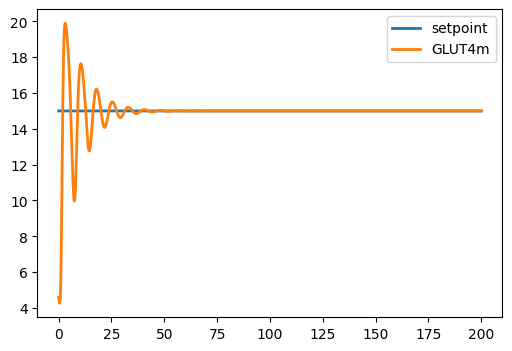

In [ ]:
def buildPITestbed(model, input_name, output_name, sign=1):
    """
    Creates an Antimony model of a PI controller using model as the open loop system.
    The resulting model as Antimony parameters for the setpoint, kP, kI. Assumes that
    this is a modular model (has an "end" statement).

    Args:
        model: str (Antimony model of OLS)
        input_name: str (name of a species in the OLS)
        output_name: str (name of a species in the OLS)
        sign: int (directional effect of input on output)

    Returns:
        str (Antimony model)
    """
    # Partition the model
    try:
        end_pos = model.index("end")
    except:
        end_pos = len(model) - 1
    model_front = model[:end_pos]
    model_back = model[end_pos:]
    control_logic = CONTROL_LOGIC % (input_name, sign, output_name, input_name)
    return model_front + control_logic + model_back

# TESTS
input_name = 'IR'
output_name = 'GLUT4m'
is_plot = True
control_model = buildPITestbed(gluc_model, input_name, output_name)

rr = te.loada(control_model)
rr["kP"] = 0.1
rr["kI"] = 0.1
rr["setpoint"] = 15
rr.simulate(0, 200, 2000, selections=["time", "setpoint", output_name])
if is_plot:
    rr.plot()



In [ ]:
def plotModel_2(model, times=None, is_plot=True, title="", selections=None,
              figsize=(5,5), ylim=None, **kwargs):
    """
    Plots a model.

    Args:
       times: np.array
       kwargs: values of parameters
    Returns:
       ExtendedRoadrunner
    """
    rr = te.loada(model)
    for key, value in kwargs.items():
        rr[key] = value
    if selections is None:
        rr.simulate(times[0], times[-1], len(times))
    else:
        if not "time" in selections:
            selections.insert(0, "time")
        rr.simulate(times[0], times[-1], len(times), selections=selections)
    if is_plot:
        if ylim is None:
            rr.plot(title=title, figsize=figsize)
        else:
            rr.plot(title=title, figsize=figsize, ylim=ylim)
    return rr

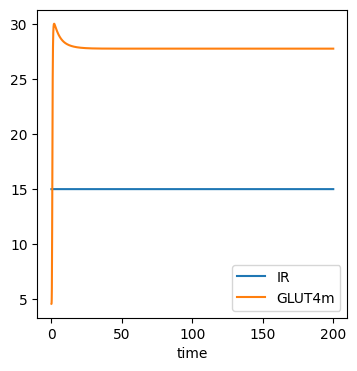

In [ ]:
s = control.TransferFunction.s
# No control model behavior

_ = plotModel(URL,  input_species="IR", selections=[ "IR",  "GLUT4m"], IR = 15, times=np.linspace(0, 200, 2000))

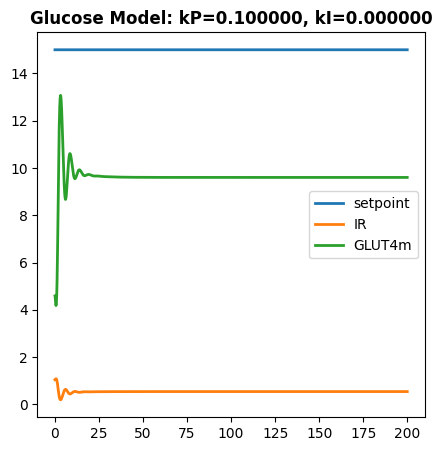

<roadrunner.RoadRunner() { this = 0x58c185d96280 }>

In [ ]:
# run experiment

# P control

kP = 0.1
kI = 0

plotModel_2(control_model, times = np.linspace(0, 200, 2000), title="Glucose Model: kP=%f, kI=%f" % (kP, kI), selections=["setpoint", input_name, output_name],
     kP=kP, setpoint=15)
# We get some oscillations in the beginning, but the output value gradually settled. The settled value is far away from the setpoint


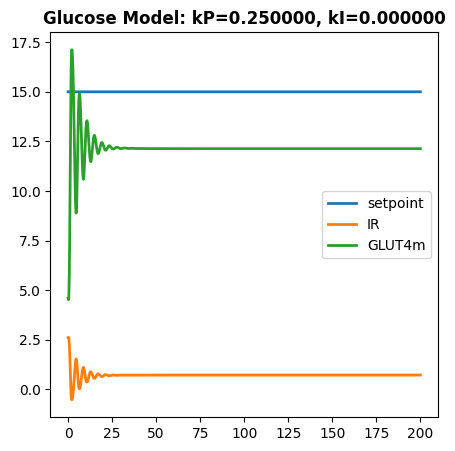

<roadrunner.RoadRunner() { this = 0x58c184cc3f00 }>

In [ ]:
# increase kP value

kP = 0.25
kI = 0

plotModel_2(control_model, times = np.linspace(0, 200, 2000), title="Glucose Model: kP=%f, kI=%f" % (kP, kI), selections=["setpoint", input_name, output_name],
     kP=kP, setpoint=15)
# there's more oscillations in the beginning, but the settled point is closer to the setpoint
# the model cannot converge with a kP value greater than 0.3

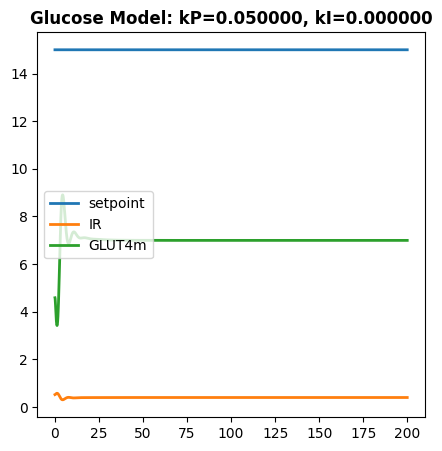

<roadrunner.RoadRunner() { this = 0x58c184659e80 }>

In [ ]:
# Decrease kP value

kP = 0.05
kI = 0

plotModel_2(control_model, times = np.linspace(0, 200, 2000), title="Glucose Model: kP=%f, kI=%f" % (kP, kI), selections=["setpoint", input_name,output_name],
     kP=kP, setpoint=15)
# there is less oscillations in the beginning, but the settled point become further away from the setpoint

In [ ]:
# I Control
kP = 0
kI = 0.1
plotModel_2(control_model, times = np.linspace(0, 200, 2000), title="Glucose Model: kP=%f, kI=%f" % (kP, kI), selections=["setpoint", output_name],kP=kP, setpoint=15)

# when setting kP to 0, no matter value value kI takes (ranging from 0.000000001 to 1000000) the model is extremely unstable.
# seem like this model cannot be achived by solely I control


RuntimeError: CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)

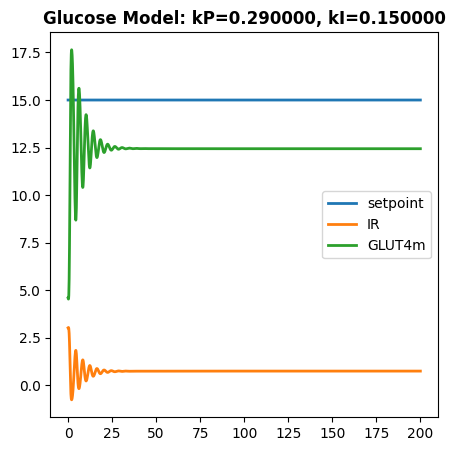

<roadrunner.RoadRunner() { this = 0x58c186eb1f10 }>

In [ ]:

# PI Control

kP = 0.29
kI = 0.15
plotModel_2(control_model, times = np.linspace(0, 200, 2000), title="Glucose Model: kP=%f, kI=%f" % (kP, kI), selections=["setpoint", input_name, output_name],kP=kP, setpoint=15)

# With both PI control, the output value seems to be able to stablized, however, it is still far away from the setpoint.

*Part 2: Root Locus Plot*

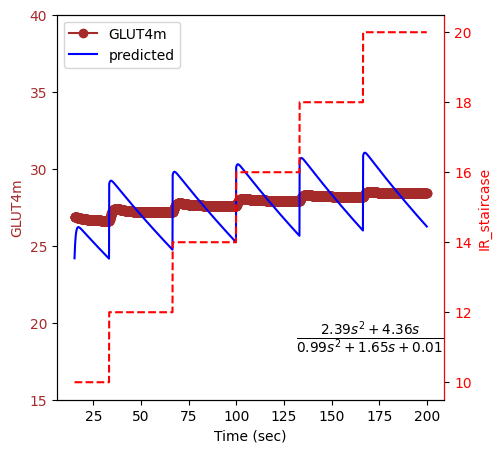

In [ ]:
_= ctlsb.plotTransferFunctionFit(num_numerator=3, num_denominator=3, initial_value=10, final_value=20, fit_start_time = 15, times=np.linspace(0, 200, 2000), ylim = [15, 40])


In [ ]:
TRANSFER_FUNCTION = ctlsb.getOpenLoopTransferFunction()
print(f"Transfer function: {TRANSFER_FUNCTION}")
print(f"Poles: {TRANSFER_FUNCTION.poles()}")
print(f"Zeros: {TRANSFER_FUNCTION.zeros()}")

Transfer function: 
      2.391 s^2 + 4.359 s
-------------------------------
0.9887 s^2 + 1.646 s + 0.008625

Poles: [-1.65970897+0.j -0.0052562 +0.j]
Zeros: [-1.82319212+0.j  0.        +0.j]


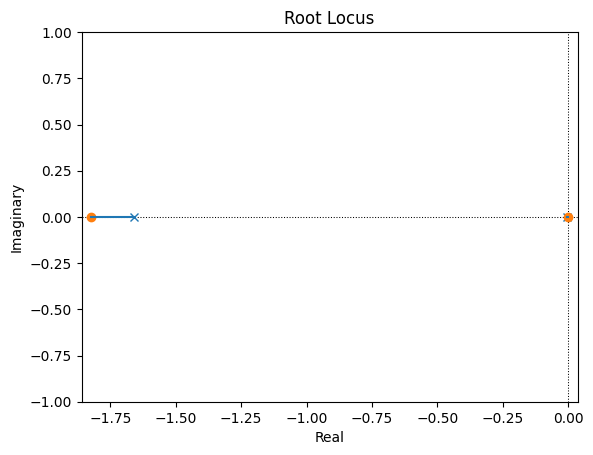

In [ ]:
_ = control.root_locus(TRANSFER_FUNCTION, grid=False)

We have two poles, both with 0 imaginary values, which means that there will be no oscillations. The one pole closer to 0 has a small range, while the pole closer to -1.6 has a bigger range. Since both pole are smaller than 0, the system will not explode. Seems like there is not much to improve on settling time.

In [ ]:
I_tf = TRANSFER_FUNCTION/s
print(f"Transfer function: {I_tf}")
print(f"Poles: {I_tf.poles()}")
print(f"Zeros: {I_tf.zeros()}")

Transfer function: 
        2.391 s^2 + 4.359 s
-----------------------------------
0.9887 s^3 + 1.646 s^2 + 0.008625 s

Poles: [-1.65970897+0.j -0.0052562 +0.j  0.        +0.j]
Zeros: [-1.82319212+0.j  0.        +0.j]


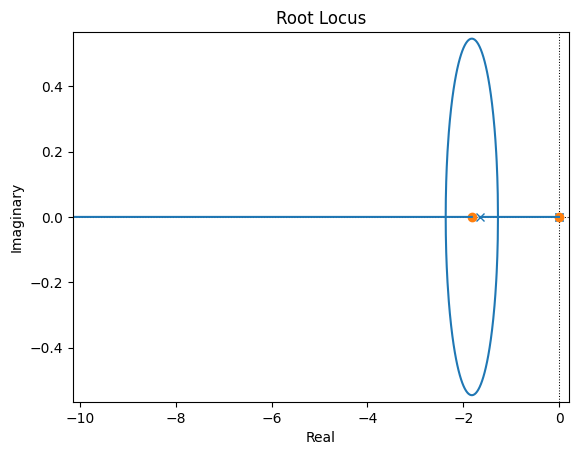

In [ ]:
_ = control.root_locus(I_tf, grid=False)

For I control, there are three poles. One is 0, one is very close to 0, and the other one is around -1.7. Seems like increasing the kI value will induce a lot of oscillations, as the value is going into the imaginary domain.

*Part 3: Grid Search*

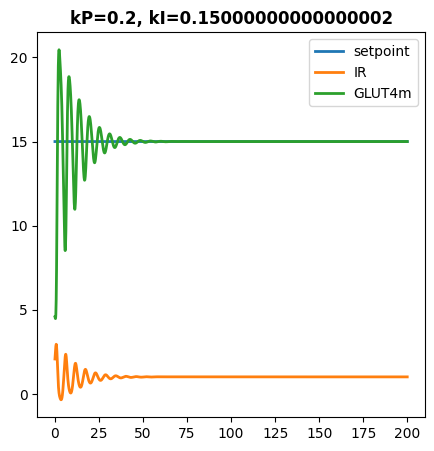

In [ ]:
# Set the search parameters and initialize
setpoint = 15
best_rmse = float("inf")
best_ks = []
kPs = [0.05*n for n in range(20)]
kIs = [0.05*n for n in range(20)]
# Do the grid search
for kI in kIs:
    for kP in kPs:
        try: # run the function that may have exceptions, but it won't stop at error, rather continue to except

            data = plotModel_2(control_model, title="", selections=["setpoint", "IR", "GLUT4m"], is_plot=False,
                  setpoint=setpoint, kP=kP, kI=kI, times=np.linspace(0, 200, 2000))
        except:
            continue
        outputs = data['GLUT4m']
        rmse = np.sum((setpoint - outputs)**2)
        if rmse < best_rmse:
            best_mse = rmse
            best_ks = [kP, kI]
# Report the results
if len(best_ks) == 0:
    print("\n***No design found.")
else:
    kP = best_ks[0]
    kI = best_ks[1]
    title = "kP={kP}, kI={kI}".format(kP=kP, kI=kI)
    _ = plotModel_2(control_model, selections=["setpoint", "IR", "GLUT4m"], is_plot=True,
                      setpoint=setpoint, kP=kP, kI=kI,
                  times=np.linspace(0, 200, 2000), title=title)

Here at kP = 0.2 and kI = 0.15, the system got a very good control. Though there are some oscillations in the beginning, the value of GLUT4m quickly settled to the setpoint.

# 4. Discussion

The hardest part of the control design for me is to find the right fit for the stair case response of the output. The GLUT4m has a non-linear increasing relationship in response to the increase of insulin receptors. This is particular interesting to observe in the diabetic model since it reflects the increasing inability of glucose transportation into fat cells as insulin receptor concentration decreases. However,  this feature seems hard to be captured by the fitting function.


I was also struggling at picking the kP and kI value, since it seems like for this model, there's a very specific range for kI. I tested a lot of values for kI in integral control, however, all of those values were causing an unstable system and raised error. I learned very vivdly that a grid search in this case is much easier and percise in terms of picking optimal kP kI values compared to hand picking.


I was particularly interested in learning how to predict the behavior of the model, and I think the series of lectures on transfer functions, DC gain and poles, PID controls, close loop system, and root licus analysis was really interesting and new to me. Though I don't now how much I will be able to apply it in my research in BCI studies, I'm glad that I learned how to quantitatively assess and manipulate when handed a computational model like this.